In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df =pd.read_csv('https://raw.githubusercontent.com/wan6570/FlyAI_Project/main/Data/ProcessedData/LCK_2023_SUMMER_DROP_NAN.csv')

In [2]:
# Filter players who have participated in more than 25 games
player_counts = df['Player'].value_counts()
players_to_keep = player_counts[player_counts > 25].index
df_filtered = df[df['Player'].isin(players_to_keep)]

# Split the dataframe based on the "Role" column
role_groups = df_filtered.groupby('Role')
role_dfs = {role: role_group for role, role_group in role_groups}

# Adjust XPD@15 for each role so that its minimum value is 50
adjustments = {role: 50 - df['XPD@15'].min() for role, df in role_dfs.items()}
for role, adjustment in adjustments.items():
    role_dfs[role]['XPD@15'] += adjustment

# Function to normalize stats for each role
def normalize_role_stats(role_df):
    role_avg_stats = role_df[['GPM', 'VSPM', 'DPM', 'KP%', 'XPD@15']].mean()
    player_avg_stats = role_df.groupby('Player')[['GPM', 'VSPM', 'DPM', 'KP%', 'XPD@15']].mean()
    normalized_stats = player_avg_stats / role_avg_stats
    return normalized_stats

# Calculate normalized stats for each role
normalized_stats_adjusted = {role: normalize_role_stats(df[df['Result'] == 'Win']) for role, df in role_dfs.items()}

In [3]:
normalized_stats_adjusted

{'ADC':                GPM      VSPM       DPM       KP%    XPD@15
 Player                                                    
 Aiming    1.047646  0.880427  0.961307  1.029514  1.050713
 Deft      0.985000  0.977871  1.141763  1.001986  0.979615
 Gumayusi  1.046356  1.065803  1.018034  1.018444  1.055948
 Hena      0.925446  0.976624  0.947660  1.005964  0.955951
 Jiwoo     0.987829  0.969773  0.952512  1.017655  0.978305
 Paduck    0.958198  0.939267  0.956987  1.005832  0.831580
 Peyz      1.018447  0.957932  0.994652  0.991204  0.970704
 Taeyoon   0.963576  1.025648  0.945299  0.958695  0.971230
 Teddy     0.968166  1.168331  0.979478  1.001316  1.029236
 Viper     0.993650  1.145080  1.023570  0.957974  1.075486,
 'JUNGLE':                GPM      VSPM       DPM       KP%    XPD@15
 Player                                                    
 Canyon    1.010592  0.947103  1.088773  1.004121  1.179943
 Cuzz      1.001983  1.021421  0.974806  1.053357  0.994919
 Grizzly   0.998829  0

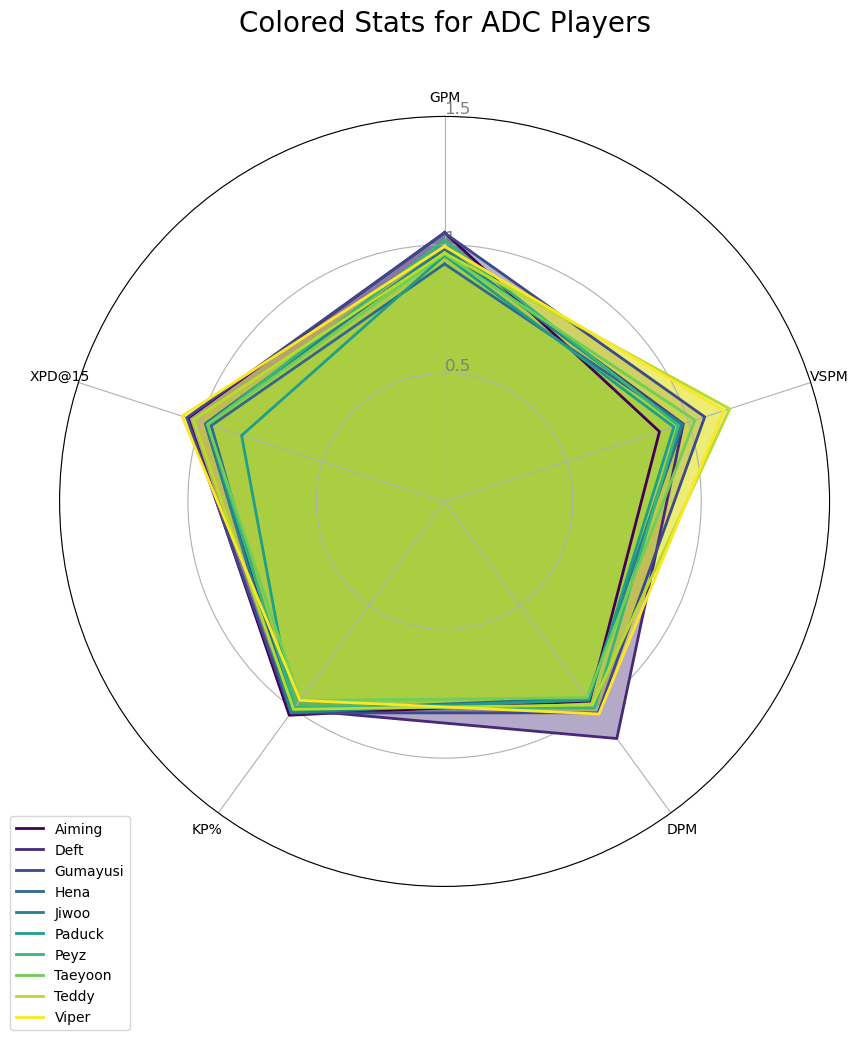

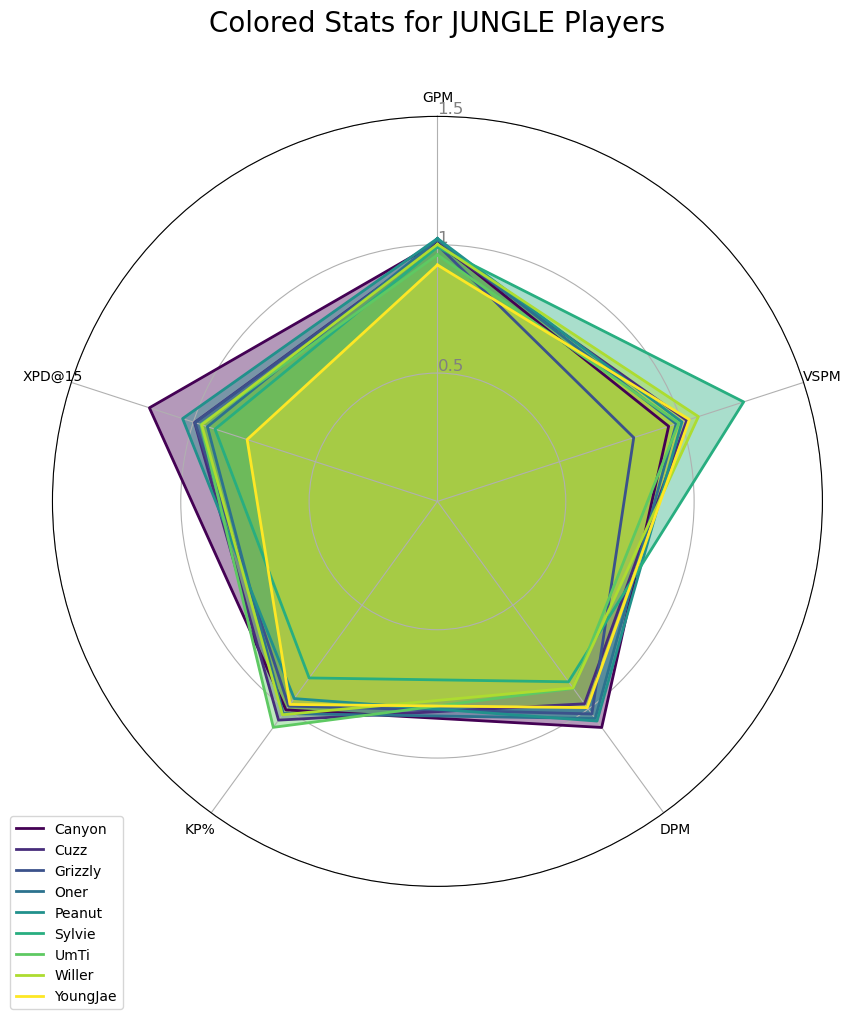

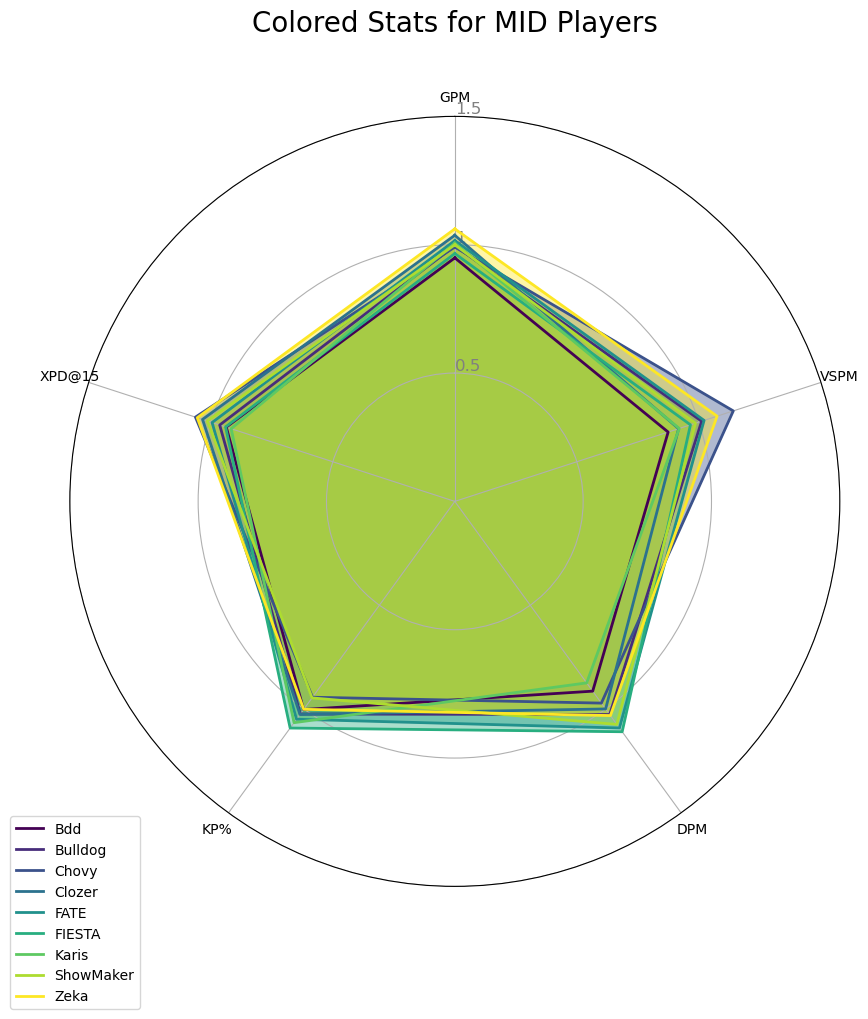

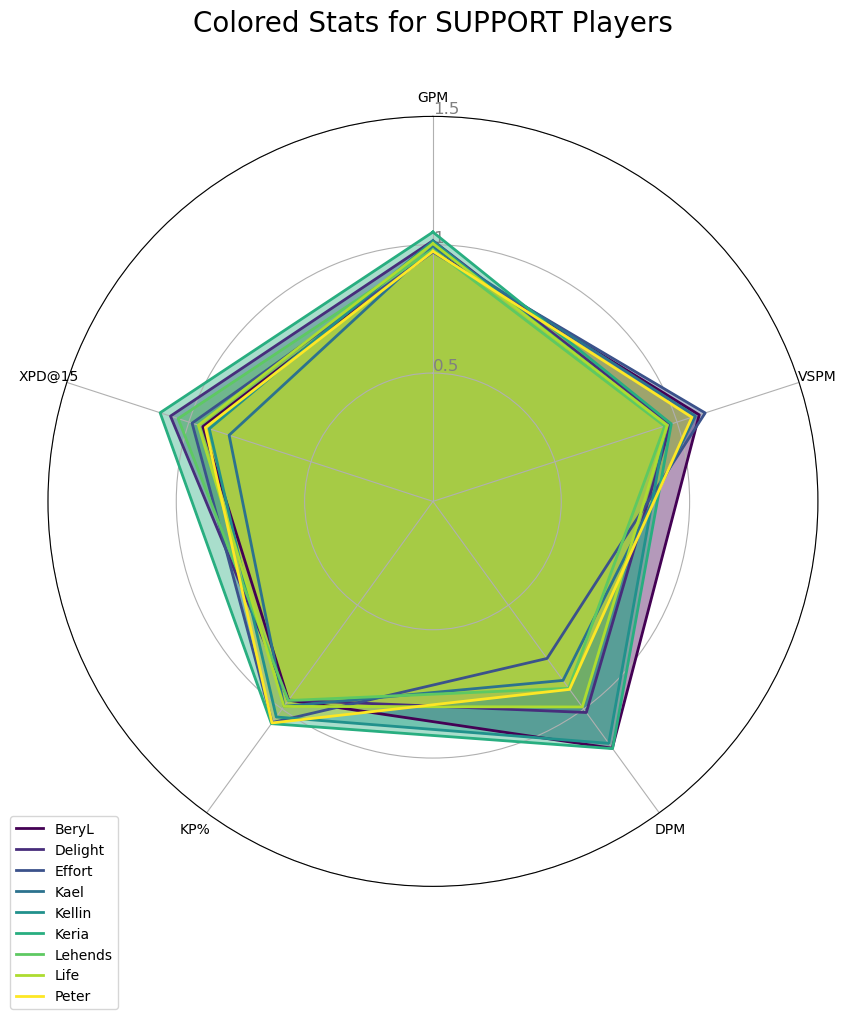

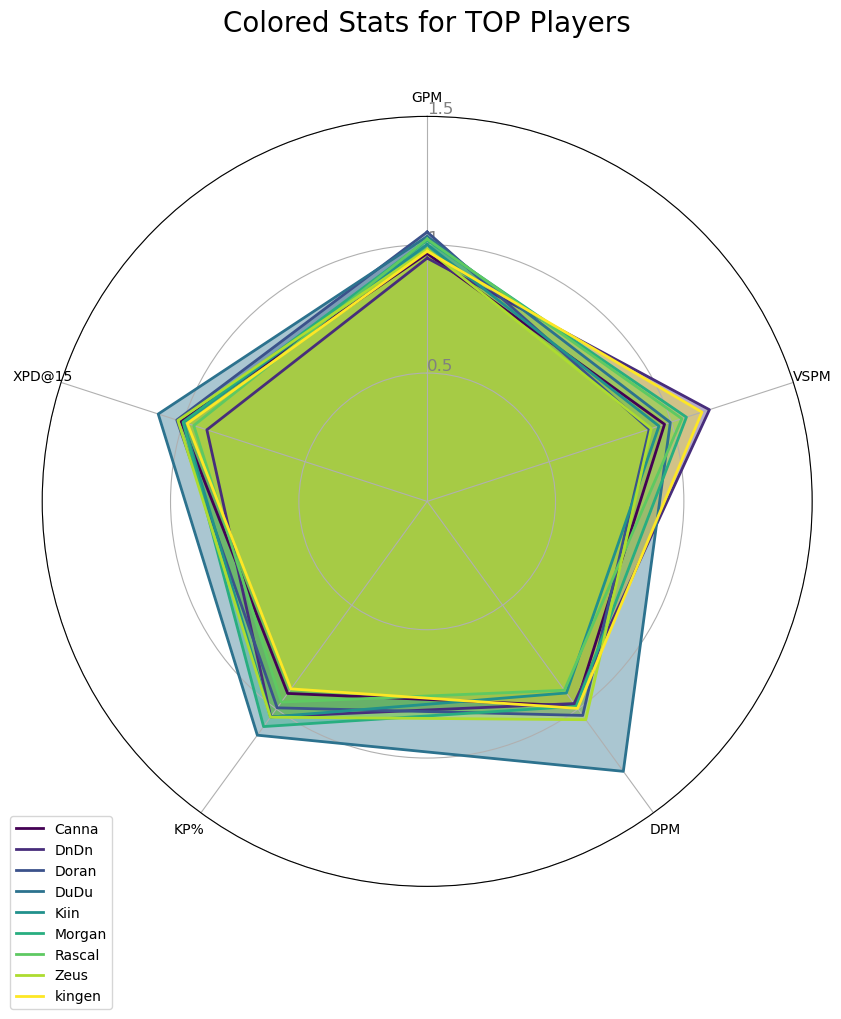

In [4]:
# Function to plot radar chart for the stats
def plot_colored_radar(data, title=""):
    categories = list(data)
    N = len(categories)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories)
    ax.set_rlabel_position(0)
    plt.yticks([0.5, 1, 1.5], ["0.5", "1", "1.5"], color="grey", size=12)
    plt.ylim(0, 1.5)
    colors = plt.cm.viridis(np.linspace(0, 1, len(data)))
    for i, (player, row) in enumerate(data.iterrows()):
        values = row.values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=player, color=colors[i])
        ax.fill(angles, values, color=colors[i], alpha=0.4)
    plt.title(title, size=20, y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()

# Plot the radar chart for all roles
for role, stats in normalized_stats_adjusted.items():
    plot_colored_radar(stats, title=f"Colored Stats for {role} Players")